In [1]:
import pandas as pd
import sklearn
import sklearn.metrics as metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as se

In [3]:
TS=pd.read_csv('TSLA.csv')
TS.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100


In [4]:
TS.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [27]:
TS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.3+ KB


In [5]:
TS.shape

(2416, 7)

In [6]:
corbt=TS[['Open','High','Low','Close','Volume','Adj Close']].corr()

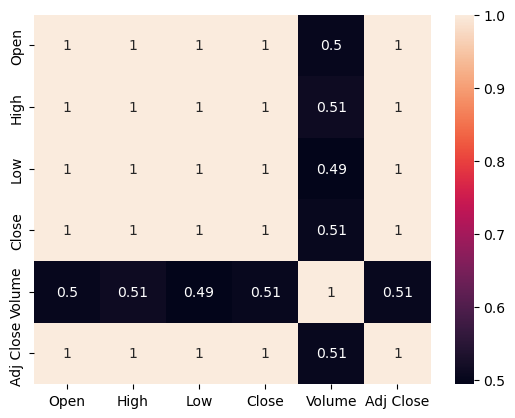

In [7]:
se.heatmap(corbt, annot=True)
plt.show()

In [8]:
from scipy import stats
def corr_sig(df=None):
    p_matrix=np.zeros(shape=(df.shape[1],df.shape[1]))
    for col in df.columns:
        for col2 in df.drop(col,axis=1).columns:
            _, p=stats.pearsonr(df[col],df[col2])
        p_matrix[df.columns.to_list().index(col),df.columns.to_list().index(col2)]=p
    return p_matrix

In [9]:
import warnings
warnings.filterwarnings("ignore")


In [62]:
x=TS[[ 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

x['last_3_close']=TS[['Close']].shift(-3)
x.loc[:,'last_3_close'].fillna(x['last_3_close'].mean(),inplace=True);

x['last_4_close']=TS[['Close']].shift(-4)
x.loc[:,'last_4_close'].fillna(x['last_4_close'].mean(),inplace=True);

x['last_5_close']=TS[['Close']].shift(-5)
x.loc[:,'last_5_close'].fillna(x['last_5_close'].mean(),inplace=True);

x['last_6_close']=TS[['Close']].shift(-6)
x.loc[:,'last_6_close'].fillna(x['last_6_close'].mean(),inplace=True);

x['last_7_close']=TS[['Close']].shift(-7)
x.loc[:,'last_7_close'].fillna(x['last_7_close'].mean(),inplace=True);

In [63]:
colnames=x.columns

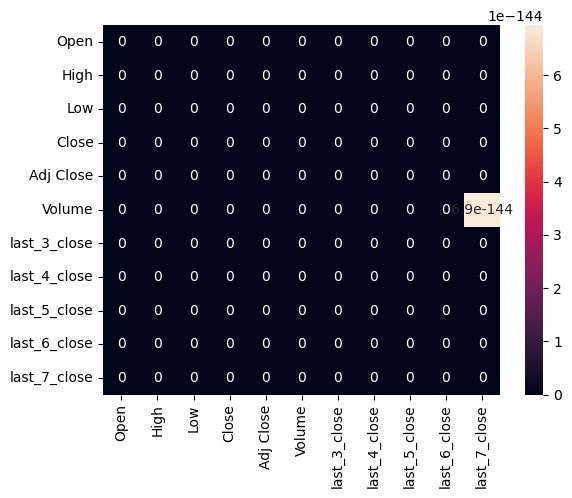

[[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0

In [64]:
NA=corr_sig(x)
df=pd.DataFrame(np.array(NA),columns=colnames,index=colnames)
se.heatmap(df,annot=True)
plt.show()
print(NA);

In [65]:
next=TS[['Close']]

In [66]:
y_next=next.shift(-1)
y_next.fillna(0,inplace=True)

In [67]:
x

,Open,High,Low,Close,Adj Close,Volume,last_3_close,last_4_close,last_5_close,last_6_close,last_7_close
0,19.000000,25.000000,17.540001,23.889999,23.889999,18766300,19.200001,16.110001,15.800000,17.459999,17.400000
1,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,16.110001,15.800000,17.459999,17.400000,17.049999
2,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,15.800000,17.459999,17.400000,17.049999,18.139999
3,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,17.459999,17.400000,17.049999,18.139999,19.840000
4,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,17.400000,17.049999,18.139999,19.840000,19.889999
...,...,...,...,...,...,...,...,...,...,...,...
2411,568.489990,576.809998,558.080017,566.900024,566.900024,11788500,650.570007,780.000000,186.746674,186.817606,186.887908
2412,575.690002,589.799988,567.429993,580.989990,580.989990,17801500,780.000000,186.675929,186.746674,186.817606,186.887908
2413,632.419983,650.880005,618.000000,640.809998,640.809998,29005700,186.606523,186.675929,186.746674,186.817606,186.887908
2414,640.000000,653.000000,632.520020,650.570007,650.570007,15719300,186.606523,186.675929,186.746674,186.817606,186.887908


In [68]:
y_next.shape

(2416, 1)

In [70]:
x_train=x.iloc[0:2000,:]
y_next_train=y_next.iloc[0:2000,:].values.ravel()


x_test=x.iloc[2000:2416,:]
y_next_test=y_next.iloc[2000:2416,:]

In [71]:
x_train.shape

(2000, 11)

In [72]:
x_test.shape

(416, 11)

In [73]:
from sklearn.linear_model  import LinearRegression
from sklearn.metrics       import mean_squared_error

163.7047113258618


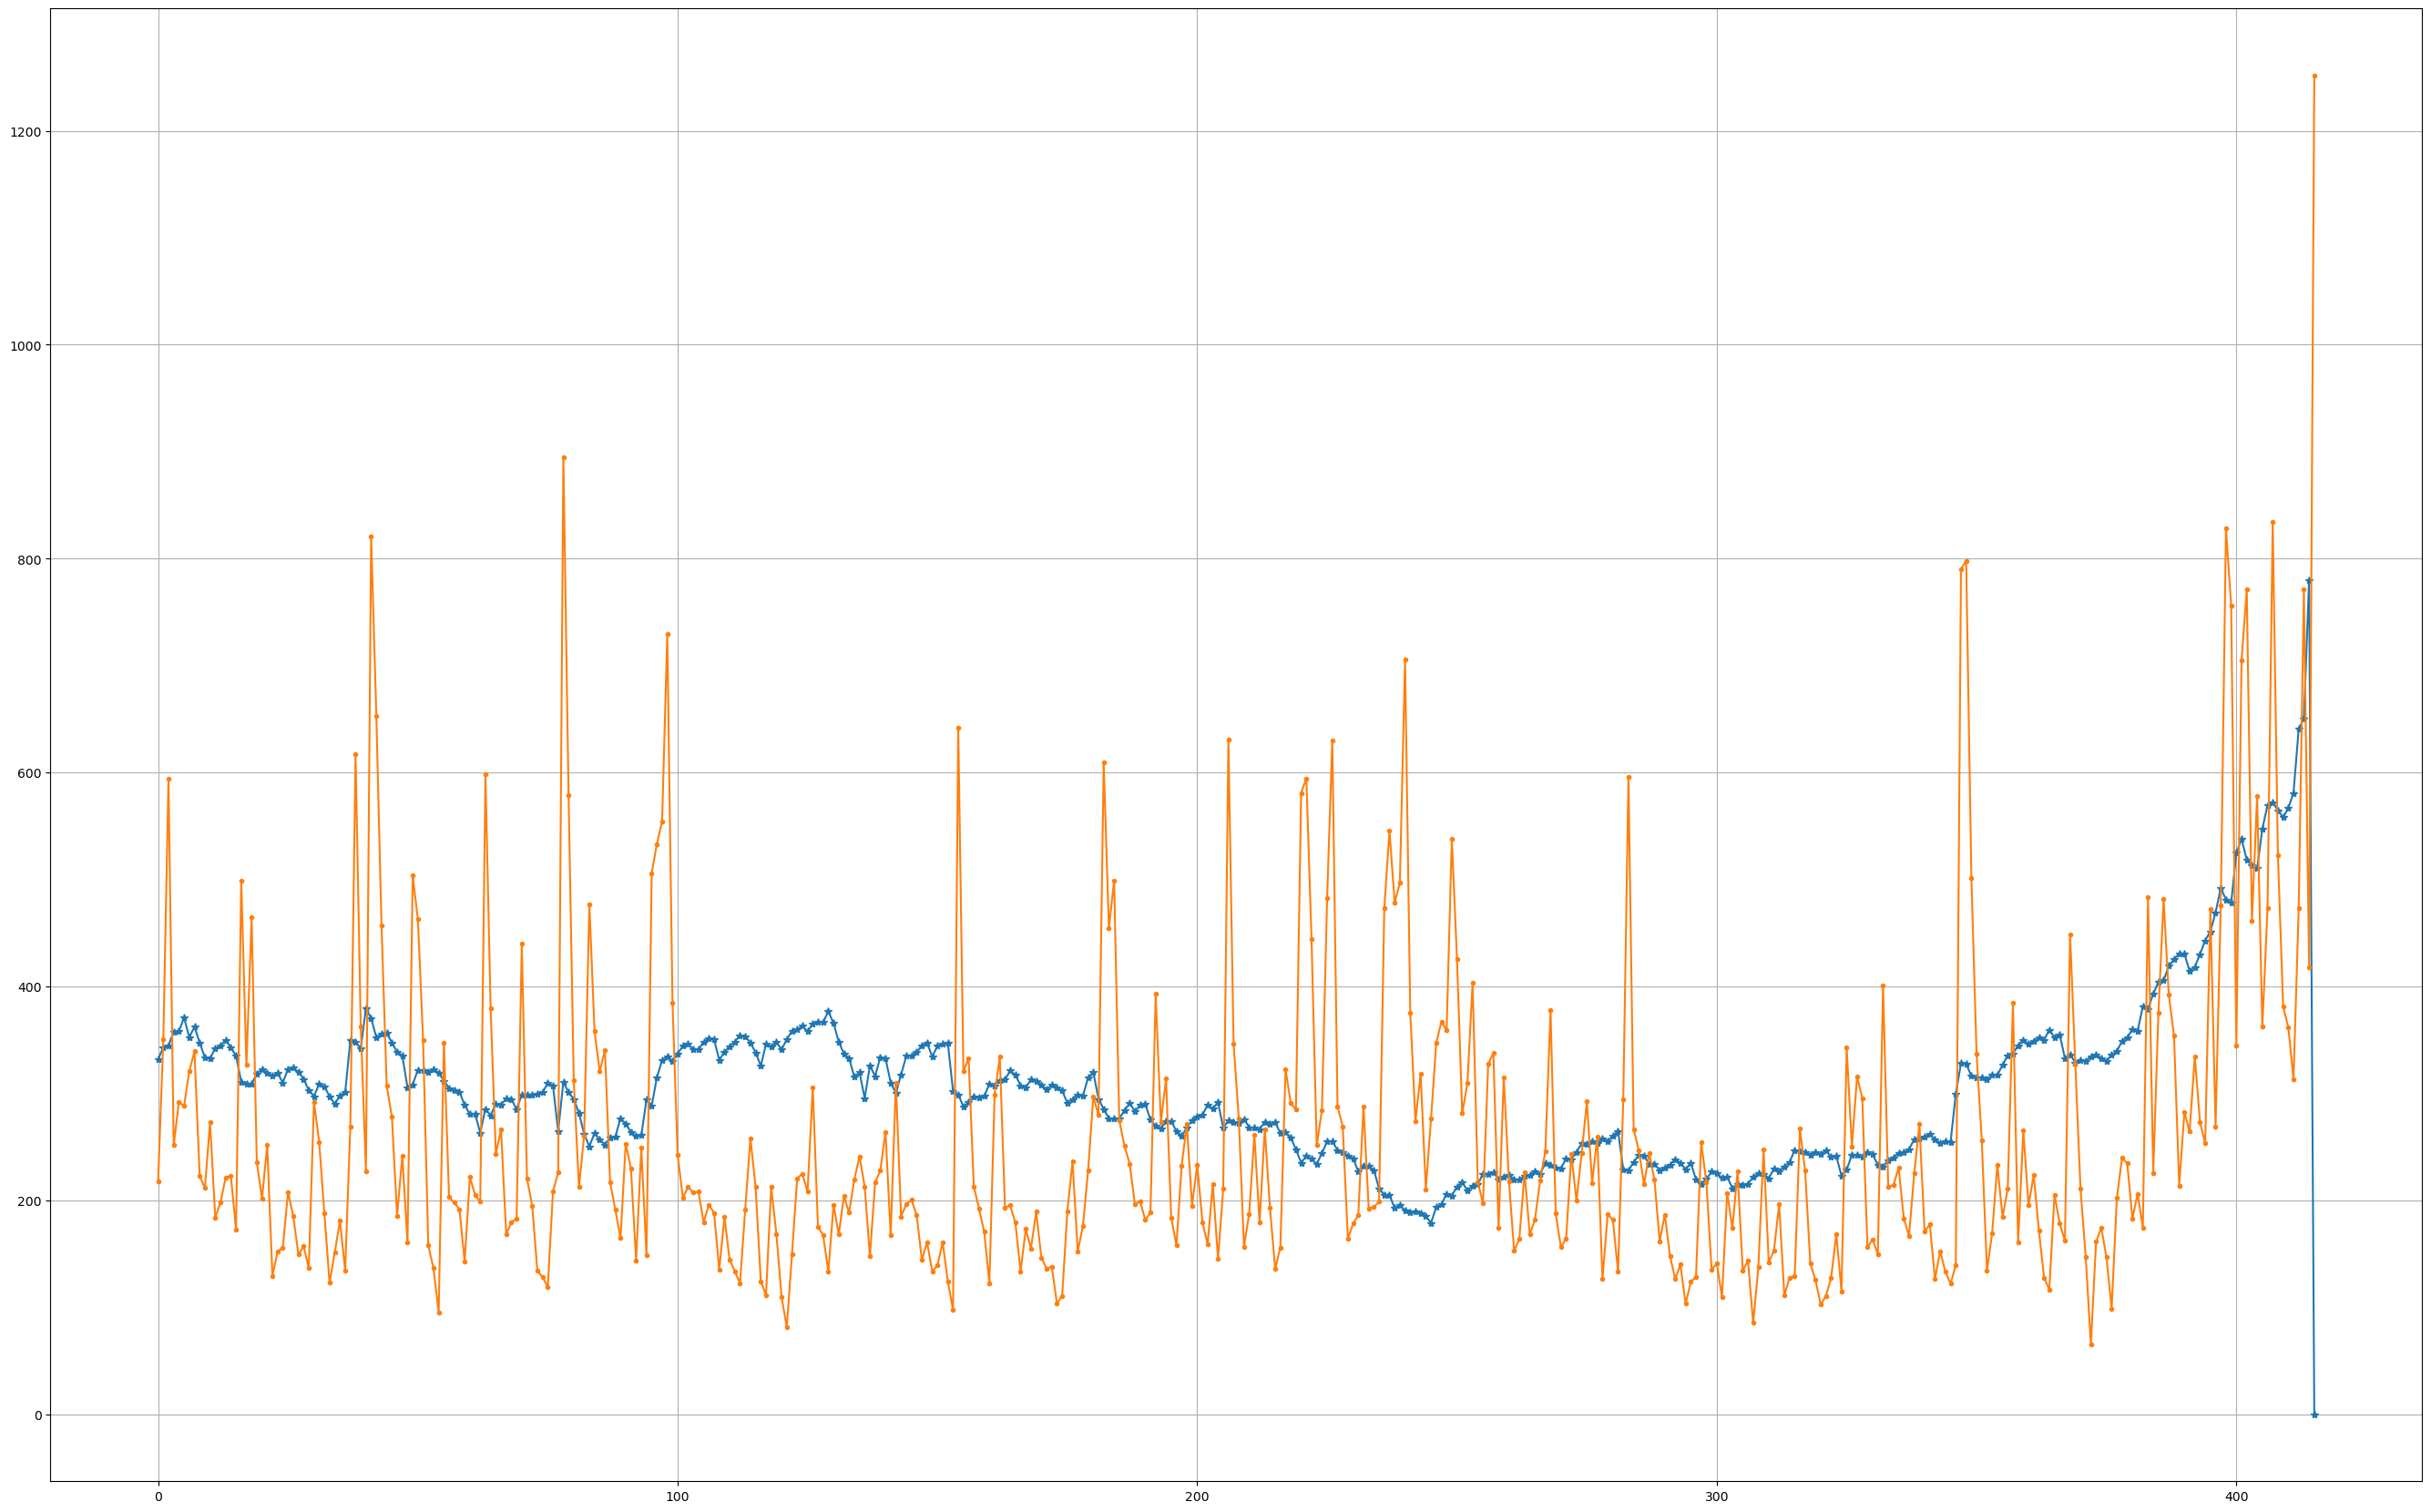

In [74]:
from sklearn.neural_network import MLPClassifier,MLPRegressor
mlp=MLPRegressor(hidden_layer_sizes=(5,30,15),
                 max_iter=10000,
                 activation='relu',
                 random_state=111,
                 shuffle=True,
                 verbose=False)
mlp.fit(x_train,y_next_train)
y_pred=mlp.predict(x_test)
mse=metrics.mean_squared_error(y_next_test,y_pred)
RMSE=np.sqrt(mse)
print(RMSE)
x1=np.array(range(0,len(y_next_test)))
golden_coaf=21
plt.figure(figsize=(golden_coaf*1.6,golden_coaf))
plt.plot(x1,y_next_test.values,marker='*')
plt.plot(x1,y_pred,marker='.')
plt.grid()
plt.show()

<div style="background-color: white; text-align: center; font-familly:B Nazanin; font-size: 18px; color:black;"><br />
<h3> Error analyze </h3><br />
<p style="text-align: center;"> </p>
</div>    

In [76]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,max_error

In [77]:
MAE=mean_absolute_error(y_next_test,y_pred)
MSE=mean_squared_error(y_next_test,y_pred)
MAPE=mean_absolute_percentage_error(y_next_test,y_pred)
MEAN=np.mean(y_next_test,axis=0)
RMSE=np.sqrt(MSE)
ME=max_error(y_next_test,y_pred)
R2=r2_score(y_next_test,y_pred)

In [78]:
pd.options.display.float_format='{:.0f}'.format

Metrics_index=pd.DataFrame(
    {
    'MEAN':MEAN,
    'MAE  (mean_absolute_error)':MAE,
    'MAPE (mean_absolute_perecentage_error)':MAPE,
    'MSE  (mean_squard_error)':MSE,
    'RMSE (Roor mean_squar_error)':RMSE,
    'ME   (Max Error)':ME,
    'R2':R2
    }
)
Metrics_index

,MEAN,MAE (mean_absolute_error),MAPE (mean_absolute_perecentage_error),MSE (mean_squard_error),RMSE (Roor mean_squar_error),ME (Max Error),R2
Close,303,126,13551885865831704,26799,164,1252,-3
